<a href="https://colab.research.google.com/github/fpinell/hands_on_python_for_ds/blob/main/notebooks/master/Lecture_4_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -U torch==1.8.0 torchtext==0.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 735.5 MB 13 kB/s 
     |████████████████████████████████| 7.1 MB 52.7 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.11.0+cu113
    Uninstalling torch-1.11.0+cu113:
      Successfully uninstalled torch-1.11.0+cu113
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.12.0
    Uninstalling torchtext-0.12.0:
      Successfully uninstalled torchtext-0.12.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.12.0+cu113 requires torch==1.11.0, but you have torch 1.8.0 which is incompatible.
torchaudio 0.11.0+cu113 requires torch==1.11.0, but you have torch 1.8.0 which is incompatible.


# Hands on Python for Data Science


### Master II Livello - Data Science and Statistical Learning (MD2SL) 2021-2022

#### Fabio Pinelli
<a href="mailto:fabio.pinelli@imtlucca.it">fabio.pinelli@imtlucca.it</a><br/>
IMT School for Advanced Studies Lucca<br/>
2021/2022<br/>
June, 25 2022

# Outline

- Pytorch
- Neural Network (fully connected)
  - Classification
  - Learning rate
  - Regression on tabular data
- CNN
- RNN



# Pytorch 

## Why ```pytorch```?

1. Because I've already done something in PyTorch
2. It is widely used now in the research environment 
3. It is more _pythonic_ the way it is implemented, thus the learning curve can be smoother than with other platform
  - use
  - extend
  - debug
4. Tensors are really similar to numpy arrays 
5. (not in our goals) It can be used for scientific computation as well, not only for _Deep Learning_ tasks



In [4]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import seaborn as sns
import os

# to make this notebook's output stable across runs
np.random.seed(42)

#import for pytorch
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
import torch.nn.functional as F
# import torchvision
# from torchvision import transforms
from PIL import Image, ImageFile



# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [5]:
# pytorch is available naturally on colab
# we can also use a gpu
# Go to Menu > Runtime > Change runtime.


import torch
# GPU available check 
print('GPU available check {}'.format(torch.cuda.is_available()))
print(torch.rand(2,2))

GPU available check False
tensor([[0.8890, 0.1478],
        [0.3910, 0.4551]])


## Tensors 

- A tensor is both a container for **numbers** and for a set of rules that define transformations between tensors producing a new tensor

- **Essentially?** A multidimensional array
- Every tensor has a rank
  - scalar --> rank 0 
  - array --> rank 1
  - $n \times n$ matrix --> rank 2

```python torch.rand(2,2)``` creates a rank 2 tensor with random values by using ```python torch.rand()``` 



### Operations with tensors

In [6]:
# we can create a tensor from lists
x = torch.tensor([[0,0,1],[1,1,1],[0,0,0]])
print(x)

tensor([[0, 0, 1],
        [1, 1, 1],
        [0, 0, 0]])


In [7]:
# we can change an element in a tensor by using standard Python indexing

x[0][0] = 5
print(x) 

tensor([[5, 0, 1],
        [1, 1, 1],
        [0, 0, 0]])


We can use special creation functions to generate particular types of tensors

- ```ones()``` generates tensors filled with 1s
- ```zeros()```  generates tensors filled with 1s

In [8]:
a = torch.zeros(2,2)
b = torch.ones(2,2)
print('First tensor\n {}'.format(a))
print('Second tensor\n {}'.format(b))

First tensor
 tensor([[0., 0.],
        [0., 0.]])
Second tensor
 tensor([[1., 1.],
        [1., 1.]])


We can perform standard mathematical operations with tensors, e.g. addind two tensors together. 



In [9]:
a = torch.tensor([[1,2],[2,3]])
b = torch.tensor([[1,1],[1,1]])
print('Check the sum\n {}'.format(a+b))

Check the sum
 tensor([[2, 3],
        [3, 4]])


And if you have a tensor of rank 0, you can access out the value with the ```item()``` function

In [10]:
print('Value of the 1D tensor: {}'.format(torch.rand(1).item()))

Value of the 1D tensor: 0.4773591160774231


Tensors can live in the **CPU** or on the **GPU** and they can be copied between devices by usint the ```to()``` function:

In [11]:
cpu_tensor = torch.rand(2)
print('In which device is the tensor? {}'.format(cpu_tensor.device))

In which device is the tensor? cpu


In [12]:
gpu_tensor = cpu_tensor.to('cuda')
print('In which device is the tensor? {}'.format(gpu_tensor.device))

RuntimeError: ignored

Quite often we need to find the maximum item in a tensor, as well as the index that contains the maximum value (it may correspond to the class that the neural network has decided upon its final prediction). 

```max()``` and ```argmax()``` are the needed functions, then we can use ```item()``` to get the _standard_ Python value from a 1D tensor. 

In [13]:
a = torch.rand(2,2)
print(a)

print('Which is the max value? {}'.format(a.max()))
print('Which is the index of the max value: {}'.format(a.argmax()))
print('Get the values\n -max: {}\n -index: {}'.format(a.max().item(),a.argmax().item()))

tensor([[0.5394, 0.5723],
        [0.1965, 0.7592]])
Which is the max value? 0.7592335939407349
Which is the index of the max value: 3
Get the values
 -max: 0.7592335939407349
 -index: 3


Sometimes we need to change the type of a tensor

In [14]:
long_tensor = torch.tensor([[0,0,1],[1,1,1],[0,0,0]])
print('which is the type of long tensor? {}'.format(long_tensor.type()))

which is the type of long tensor? torch.LongTensor


In [15]:
float_tensor = long_tensor.to(dtype=torch.float32)
float_tensor_2 = long_tensor.type(torch.float64) #second method to change type
print('which is the type of long tensor? {}'.format(float_tensor.type()))
print('which is the type of long tensor? {}'.format(float_tensor_2.type()))

which is the type of long tensor? torch.FloatTensor
which is the type of long tensor? torch.DoubleTensor


If you remember in ```pandas``` we could perform operations of dataframes using the parameter ```in_place = True```. 

We could perform something similar on tensors. 

Functions can be applied _inplace_ if exists the original fuction with appended underscore '_'. 

Let see an example:

In [16]:
random_tensor = torch.rand(2,2)
new_random = random_tensor.log2()
print(random_tensor)
print(new_random)

tensor([[0.2616, 0.6324],
        [0.2583, 0.2979]])
tensor([[-1.9348, -0.6612],
        [-1.9530, -1.7471]])


In [17]:
print(random_tensor.log2_())

tensor([[-1.9348, -0.6612],
        [-1.9530, -1.7471]])


Some nice manipulation that can be done with tensors
- reshape / view
- column permutation
- slice a tensor

Let's try with a simple random tensor, and with the ```MINST``` dataset that is represented in numpy arrays of 784 elements

In [18]:
'''
reshape() function. It is really similar to numpy reshape function. There are a
lot of similarities between tensors and numpy operations/functions
'''

flat_tensor = torch.rand(784)
reshaped_tensor = flat_tensor.reshape(1,28,28) #1 is the number of channels
print('Flat tensor shape {}'.format(flat_tensor.shape))
print('Flat tensor shape {}'.format(reshaped_tensor.shape))

'''
view() function. Same behaviour of reshape, the main difference is that the view 
changes if the original one is changed
'''
flat_tensor = torch.rand(784)
reshaped_tensor = flat_tensor.view(1,28,28) #1 is the number of channels
print('Flat tensor shape {}'.format(flat_tensor.shape))
print('Flat tensor shape {}'.format(reshaped_tensor.shape))

'''
The reshaped tensor can't have a number of elements different than the original one
'''
flat_tensor = torch.rand(784)
reshaped_tensor = flat_tensor.view(3,28,28)



Flat tensor shape torch.Size([784])
Flat tensor shape torch.Size([1, 28, 28])
Flat tensor shape torch.Size([784])
Flat tensor shape torch.Size([1, 28, 28])


RuntimeError: ignored

In [19]:

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

X_train = X[:50000]
y_train = y[:50000]

X_val = X[50000:60000]
y_val = y[50000:60000]

X_test = X[60000:]
y_test = y[60000:]

In [20]:
print('shape of x train: {}'.format(X_train.shape))

shape of x train: (50000, 784)


In [21]:
'''
Let's create a tensor from the numpy arrays
'''
x_train_tensor,x_val_tensor, x_test_tensor = map(torch.FloatTensor, (X_train, X_val, X_test))
y_train_tensor,y_val_tensor, y_test_tensor = map(torch.LongTensor, (y_train,y_val, y_test))

# y_train_tensor = y_train_tensor.type(torch.LongTensor)
# y_test_tensor = y_test_tensor.type(torch.LongTensor)

In [22]:
print(x_train_tensor.shape,x_train_tensor.size())
x_train_tensor_reshaped = x_train_tensor.reshape([-1,28,28])

print(x_train_tensor_reshaped.size())


torch.Size([50000, 784]) torch.Size([50000, 784])
torch.Size([50000, 28, 28])


Dimensions permutations. The order of the "columns" is not the one useful for our tasks so we need to change the order. 
For instance, images are stored as ```[height, width, channel]``` tensors, but PyTorch prefers to deal with these in a ```[channel, height, width ] order```

```
permute() 
```

In [23]:
hwc_tensor = torch.rand(643,232,9)
chw_tensor = hwc_tensor.permute(2,0,1)
print('Shape of hwc tensor {}',hwc_tensor.shape)
print('Shape of chw tensor {}',chw_tensor.shape)

Shape of hwc tensor {} torch.Size([643, 232, 9])
Shape of chw tensor {} torch.Size([9, 643, 232])


Slice on tensors to access certain elements of the data structrure

the shape is torch.Size([50000, 28, 28])
the shape of the cropped tensor is torch.Size([50000, 10, 28])


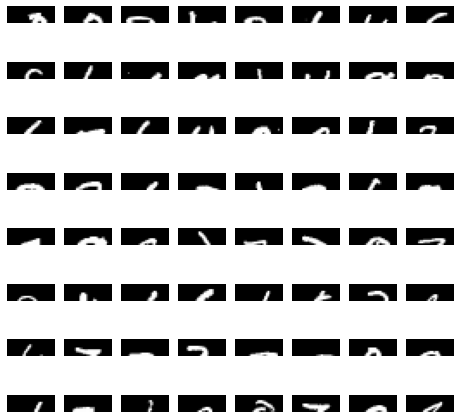

In [24]:
'''
Take the ten first lines for all the images
'''

print('the shape is {}'.format(x_train_tensor_reshaped.size()))

selected_part = x_train_tensor_reshaped[:,:10,:]

print('the shape of the cropped tensor is {}'.format(selected_part.size()))

fig, axes = plt.subplots(8,8,figsize=(8,8))
for i in range(8):
    for j in range(8):
        num_index = np.random.randint(len(selected_part))
        axes[i,j].imshow(selected_part[num_index].numpy(), cmap="gray")
        axes[i,j].axis("off")
plt.show() 

Numpy iteroperability: 
- From ```Tensor``` to ```numpy.array```
- From ```numpy.array``` to ```Tensor```

In [25]:
points = torch.zeros(3,4)
points_np = points.numpy()

print('Type points: {}'.format(type(points)))
print('Type points_np: {}'.format(type(points_np)))

new_points = torch.from_numpy(points_np)
print('Type new_points: {}'.format(type(new_points)))


Type points: <class 'torch.Tensor'>
Type points_np: <class 'numpy.ndarray'>
Type new_points: <class 'torch.Tensor'>


# Our first Neural Network in this class :-) 

- prepare the data for pytorch ```Dataset``` and ```DataLoader```
- create the network, loss, optimizer
- training 


PyTorch has developed standard conventions of interacting with data that make it fairly consistent to work with, whether you are working with images, text, or audio


```Dataset``` and ```DataLoader``` are two classes used to create the data in the format needed for PyTorch.

- ```Dataset``` is a python class that allows us to get at the data we are supplying to the neural network 
- ```DataLoader``` is what feeds data from the dataset into the network 

Every dataset, no matter whether it includes images, audio, text, etc, can interact with PyTorch if it satisfies this abstract Python class: 

```python
class Dataset(object):
  def __getitem__(self,index):
    raise NotImplementedError
  def __len__(self):
    raise NotImplementedError
```

We have to implement a method that returns the size of our dataset (```len```), and implement a method that can retrieve an item from our dataset in a (*label,tensor*) pair.

The dataset is called, then by the data loader and it pushes data into the the network.

It is possible to use the class ```TensorDataset```

There are also some package that help us on do it, for instance: 
```torchvision``` with ImageFolder, ```torchtext```. 

[torchvision](https://pytorch.org/vision/stable/index.html)

[torchtext](https://pytorch.org/text/stable/index.html)




## Classification

In [26]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

batch_size = 32 
train_ds = TensorDataset(x_train_tensor, y_train_tensor)
train_dl = DataLoader(
    train_ds, batch_size=batch_size, shuffle=True)

val_ds = TensorDataset(x_val_tensor, y_val_tensor)
val_dl = DataLoader(
    val_ds, batch_size=batch_size, shuffle=True)


test_ds = TensorDataset(x_test_tensor, y_test_tensor)
test_dl = DataLoader(test_ds, batch_size=batch_size)


In [27]:
from torch.utils.data import Dataset, DataLoader
class imageDataset(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)
 

In [28]:
train_ds = imageDataset(x_train_tensor, y_train_tensor)
train_dl = DataLoader(
    train_ds, batch_size=batch_size, shuffle=True)


The definition of a network uses the ```nn.Module``` of pytorch. 

```Linear``` defines the structure of each layer
```forward``` defines how the data should flow across the different layers of the network
```relu``` is the activation function

For each layer we define the size of the input and the output.
For instance, the first layer takes in input the same shape of the MINST images. Then, it passes the dato to a 200 nodes.

The latest layer returns an output equal to the number of classes. 

To understand which is the predicted class we need to take the ```argmax()``` of the output, such as the index of max score assigned to each instance by the network. 

In [29]:
class SimpleNet(nn.Module):

    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(784, 200)
        self.fc2 = nn.Linear(200, 50)
        self.fc3 = nn.Linear(50,10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [30]:
'''
create an instance of the network
'''
simplenet = SimpleNet()

In [31]:
'''
Definition of an optimizer, in this case we select the Adam optimizer
Another possible optimizer is the SGD that is possibile to select from 
the same class optim
'''
optimizer = optim.Adam(simplenet.parameters(), lr=0.001)
optimizer_regr = optim.SGD(simplenet.parameters(),lr=0.0001)

In [32]:
'''
And then, we need a definition of the loss. 
Also in this case, we can select one of those made available by pytorch
For regression, for instance we could select the MSELoss
'''
loss = nn.CrossEntropyLoss()
loss_regression = nn.MSELoss()

In [33]:
'''
Let's put everything together. 
The network, the optimizer and the loss inside a training loop, using the DataLoader
objects that we have already created.
'''

'''
Note: model.train() --> the model is set on training mode, where the weights and biases 
are adjusted using the training instance passed in batches.
'''


'''
Note: model.eval() --> when we evaluate the model on the validation set.
'''

'''
This function with some refinements can be used for any model, the training process
is really similar, it might change few details
'''

def train(model, optimizer, loss_fn, train_loader, val_loader, epochs=20, device="cpu"):
    model.to(device)
    for epoch in range(1, epochs+1):
        training_loss = 0.0
        valid_loss = 0.0
        model.train() #train status for the mode
        for batch in train_loader:
            optimizer.zero_grad() # clear gradients for next train
            inputs, targets = batch
            inputs = inputs.to(device)
            targets = targets.to(device)
            output = model(inputs)
            loss = loss_fn(output, targets)
            loss.backward() # backpropagation, compute gradients
            optimizer.step() # apply gradients
            training_loss += loss.data.item() * inputs.size(0)
            # print(training_loss,loss.data.item(),inputs.size(0))
        training_loss /= len(train_loader.dataset)
        
        with torch.no_grad(): # we are not updating the model
          model.eval() #the status of the model is in eval
          num_correct = 0 
          num_examples = 0
          for batch in val_loader:
              inputs, targets = batch
              inputs = inputs.to(device)
              output = model(inputs)
              targets = targets.to(device)
              loss = loss_fn(output,targets) 
              valid_loss += loss.data.item() * inputs.size(0)
              correct = torch.eq(torch.max(F.softmax(output, dim=1), dim=1)[1], targets)
              num_correct += torch.sum(correct).item()
              num_examples += correct.shape[0]
          valid_loss /= len(val_loader.dataset)

        print('Epoch: {}, Training Loss: {:.4f}, Validation Loss: {:.4f}, accuracy = {:.4f}'.format(epoch, training_loss,
        valid_loss, num_correct / num_examples))

1. In each epoch:
  
  a. we take a batch $b$ from our training set
  
  b. we pass $b$ to our model and we compute the loss from the $output$
  
  c. to compute the gradients, we call ```backward()```
  
  d. the ```optimizer.step()``` method uses those gradients afterward to perform the adjustments of the weights

```zero_grad()``` it is used to make sure that gradients are not influeced by previous batches. 


In [34]:
'''
How to move the model to cuda (if available)
'''

if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

simplenet.to(device)


SimpleNet(
  (fc1): Linear(in_features=784, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=10, bias=True)
)

In [35]:
train(simplenet, optimizer,torch.nn.CrossEntropyLoss(), train_dl,val_dl, epochs=5)

Epoch: 1, Training Loss: 0.3381, Validation Loss: 0.1841, accuracy = 0.9485
Epoch: 2, Training Loss: 0.1519, Validation Loss: 0.1377, accuracy = 0.9616
Epoch: 3, Training Loss: 0.1298, Validation Loss: 0.1337, accuracy = 0.9623
Epoch: 4, Training Loss: 0.1122, Validation Loss: 0.1536, accuracy = 0.9609
Epoch: 5, Training Loss: 0.1026, Validation Loss: 0.1610, accuracy = 0.9586


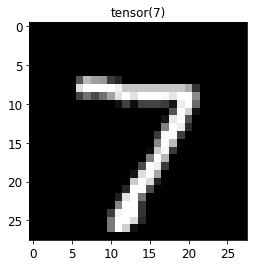

All the scores: tensor([-10.8520,   4.8264,   6.5156,   9.0034,   0.5064,  -7.0086, -22.3686,
         22.9051,  -1.7736,   8.0848])
The max score: 22.905109405517578
The index of the max score: 7


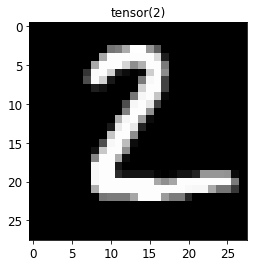

All the scores: tensor([ 4.3635,  9.6638, 20.5341,  6.4799, -1.8575, -5.4071,  3.5295,  8.8860,
         7.9438, -8.2597])
The max score: 20.53411102294922
The index of the max score: 2


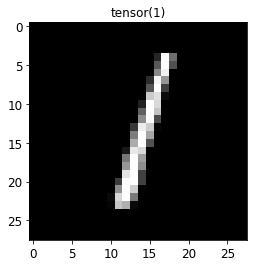

All the scores: tensor([-0.2817, 13.1139,  4.3560, -3.8981,  1.0013,  0.7810, -8.4674,  4.3405,
         5.0793, -9.3180])
The max score: 13.113876342773438
The index of the max score: 1


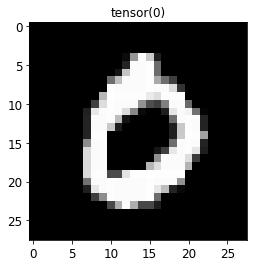

All the scores: tensor([ 2.6378, -7.0833, -2.7576, -0.5950, -0.3714, -2.3296,  0.8662, -3.9238,
        -2.5434, -0.9138])
The max score: 2.637831687927246
The index of the max score: 0


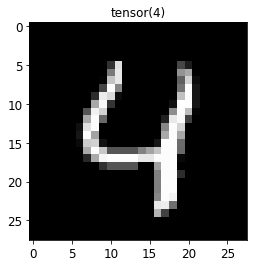

All the scores: tensor([-7.1281e+00, -6.5048e+00, -6.3744e-01, -6.6246e+00,  8.9863e+00,
        -7.4362e+00, -7.6722e+00, -3.1646e+00, -3.9556e+00, -2.6524e-04])
The max score: 8.98633861541748
The index of the max score: 4


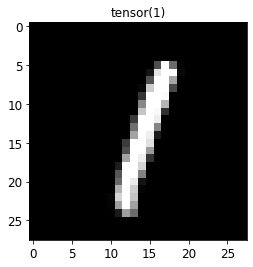

All the scores: tensor([-0.2431, 13.4362,  4.0290, -6.4691,  0.6078, -3.6280, -8.2491,  4.6289,
         4.6682, -9.2168])
The max score: 13.4361572265625
The index of the max score: 1


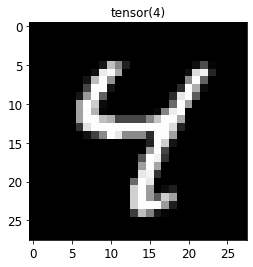

All the scores: tensor([-1.3567, -1.4282,  2.5589, -2.7639,  5.6342, -4.5248, -1.4813, -2.5804,
         3.0275, -0.5056])
The max score: 5.6342010498046875
The index of the max score: 4


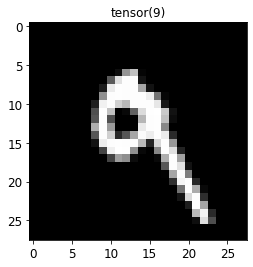

All the scores: tensor([-5.9470, -7.6498, -5.0643, -0.3069,  2.3897, -0.3118, -9.9868,  0.4455,
        -1.6796,  4.9532])
The max score: 4.953170299530029
The index of the max score: 9


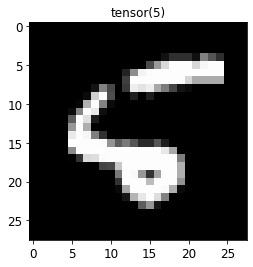

All the scores: tensor([ -0.2868,   0.4175,  -3.7855,   2.3120,  -1.4934,   9.7247,  11.5030,
        -11.5614,   3.4710,   2.3147])
The max score: 11.502976417541504
The index of the max score: 6


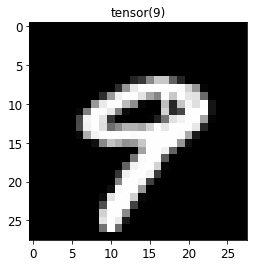

All the scores: tensor([-14.8104,  -9.6944, -11.3959,  -4.8694,   4.4244,  -4.0548, -23.8510,
          4.1131,  -5.9531,   9.8068])
The max score: 9.806801795959473
The index of the max score: 9


In [36]:
with torch.no_grad():
  simplenet.eval() # we move to eval state, since we don't need to update the weights and biases
  for i in range(10):
    plt.imshow(x_test_tensor[i].reshape((28,28)), cmap="gray")
    plt.title(y_test_tensor[i])
    plt.show()
    print("All the scores: {}".format(simplenet(x_test_tensor[i].float())))
    print("The max score: {}".format(simplenet(x_test_tensor[i].float()).max()))
    print("The index of the max score: {}".format(simplenet(x_test_tensor[i].float()).argmax()))

## Methods to find the best **Learning Rate**
- gridsearch: use different learning rate values, and verify which is the best parameters configuration w.r.t. a certain error measure
- Over the course of an epoch start out with a small learning rate and increase it to higher values over each batch. At the end of the epoch the learning rate will be high. We compute the ```loss``` for each rate. 

Then find in a plot (learning_rate, loss) the learning rate that gives the greatest decline.

In [37]:
def find_lr(model, loss_fn, optimizer, train_loader,init_value = 1e-8, final_value=1, device="cpu"):
    number_in_epoch = len(train_loader) - 1
    update_step = (final_value / init_value) ** (1 / number_in_epoch)
    lr = init_value
    optimizer.param_groups[0]["lr"] = lr
    training_loss = 0.0
    best_loss = 0.0
    batch_num = 0
    losses = []
    log_lrs = []
    model.train()
    for data in train_loader:
      # print('Batch number: {}'.format(batch_num))
      batch_num += 1
      inputs, targets = data
      inputs = inputs.to(device)
      targets = targets.to(device)
      optimizer.zero_grad()
      outputs = model(inputs)
      loss = loss_fn(outputs, targets)
      # print(loss)
      # Crash out if loss explodes

      if batch_num > 1 and loss > 10 * best_loss:
        print('Exploded current loss: {} best_loss: {}'.format(loss,best_loss))
        return log_lrs, losses

      # Record the best loss

      if loss < best_loss or batch_num == 1:
          best_loss = loss

      # Store the values
      losses.append(loss.item())
      log_lrs.append((lr))

      # Do the backward pass and optimize

      loss.backward()
      optimizer.step()

        # Update the lr for the next step and store

      lr *= update_step
      optimizer.param_groups[0]["lr"] = lr
    
    print(len(log_lrs),len(losses))
    if len(log_lrs) > 20:
      print(len(log_lrs),len(losses))
      return log_lrs[10:-5], losses[10:-5]
    else:
      return log_lrs, losses


In [38]:
#load the data again just to be sure what we are using
batch_size = 128
train_ds = TensorDataset(x_train_tensor, y_train_tensor)
train_dl = DataLoader(
    train_ds, batch_size=batch_size, shuffle=True)

simplenet = SimpleNet()
optimizer = optim.Adam(simplenet.parameters(), lr=0.001)
(lrs, losses) = find_lr(simplenet, torch.nn.CrossEntropyLoss(), optimizer, train_dl,device='cpu')


Exploded current loss: 2.911546230316162 best_loss: 0.27127939462661743


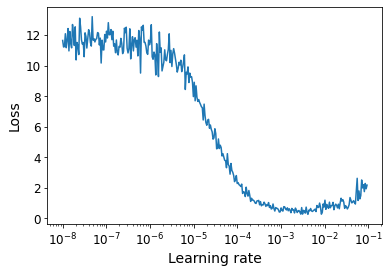

In [39]:
plt.plot(lrs, losses,)

plt.xscale("log")
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.show()

## Regression
Let's try now with a regression problem

we will use the wine quality data and try to regress on the quality

In [40]:
path_github = 'https://raw.githubusercontent.com/fpinell/hands_on_python_for_ds/main/data/winequality-white.csv'
df = pd.read_csv(path_github,sep=';')
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


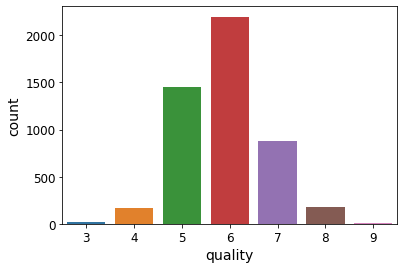

In [42]:
import seaborn as sns

sns.countplot(x = 'quality', data=df)

X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [43]:
from sklearn.model_selection import train_test_split

# Train - Test
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
# Split train into train-val
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1, random_state=21)


In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # scaling the data
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
X_train, y_train = np.array(X_train), np.array(y_train)
X_val, y_val = np.array(X_val), np.array(y_val)
X_test, y_test = np.array(X_test), np.array(y_test)

In [45]:
y_train, y_test, y_val = y_train.astype(float), y_test.astype(float), y_val.astype(float)


In [46]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
class RegressionDataset(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


In [47]:
train_dataset = RegressionDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).float())
val_dataset = RegressionDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).float())
test_dataset = RegressionDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).float())

In [48]:
print("The type of train_dataset is? {}".format(type(train_dataset)))

The type of train_dataset is? <class '__main__.RegressionDataset'>


In [49]:
EPOCHS = 150
BATCH_SIZE = 64
LEARNING_RATE = 0.001
NUM_FEATURES = X.shape[1]

In [50]:
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=32)
test_loader = DataLoader(dataset=test_dataset, batch_size=1)

In [51]:
print("The type of train_dataset is? {}".format(type(train_loader)))

The type of train_dataset is? <class 'torch.utils.data.dataloader.DataLoader'>


In [52]:
class MultipleRegression(nn.Module):
    def __init__(self, num_features):
        super(MultipleRegression, self).__init__()
        
        self.layer_1 = nn.Linear(num_features, 16)
        self.layer_2 = nn.Linear(16, 32)
        self.layer_3 = nn.Linear(32, 16)
        self.layer_out = nn.Linear(16, 1)
        
        self.relu = nn.ReLU()
    
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.relu(self.layer_2(x))
        x = self.relu(self.layer_3(x))
        x = self.layer_out(x)
        return (x)
    
    def predict(self, test_inputs):
        x = self.relu(self.layer_1(test_inputs))
        x = self.relu(self.layer_2(x))
        x = self.relu(self.layer_3(x))
        x = self.layer_out(x)
        return (x)

In [53]:
model = MultipleRegression(NUM_FEATURES)
# model.to(device)
print(model)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)


MultipleRegression(
  (layer_1): Linear(in_features=11, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=32, bias=True)
  (layer_3): Linear(in_features=32, out_features=16, bias=True)
  (layer_out): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
)


In [54]:
loss_stats = {
    'train': [],
    "val": []
}

In [55]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [56]:
model.to(device)
print("Begin training.")
for e in range(1, EPOCHS+1):
    
    # TRAINING
    train_epoch_loss = 0
    model.train()
    for X_train_batch, y_train_batch in train_loader:
        X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
        optimizer.zero_grad()
        
        y_train_pred = model(X_train_batch)
        
        train_loss = criterion(y_train_pred, y_train_batch.reshape(-1,1))
        
        train_loss.backward()
        optimizer.step()
        
        train_epoch_loss += train_loss.item()
    # VALIDATION    
    with torch.no_grad():
        
        val_epoch_loss = 0
        
        model.eval()
        for X_val_batch, y_val_batch in val_loader:
            X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)
            
            y_val_pred = model(X_val_batch)
                        
            val_loss = criterion(y_val_pred, y_val_batch.unsqueeze(1))
            
            val_epoch_loss += val_loss.item()
        loss_stats['train'].append(train_epoch_loss/len(train_loader))
        loss_stats['val'].append(val_epoch_loss/len(val_loader))                              
    
    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f}')


Begin training.
Epoch 001: | Train Loss: 28.10056 | Val Loss: 19.89811
Epoch 002: | Train Loss: 7.25749 | Val Loss: 1.03790
Epoch 003: | Train Loss: 0.86110 | Val Loss: 0.79095
Epoch 004: | Train Loss: 0.79855 | Val Loss: 0.75553
Epoch 005: | Train Loss: 0.75972 | Val Loss: 0.73654
Epoch 006: | Train Loss: 0.72262 | Val Loss: 0.72840
Epoch 007: | Train Loss: 0.69052 | Val Loss: 0.68874
Epoch 008: | Train Loss: 0.67345 | Val Loss: 0.68823
Epoch 009: | Train Loss: 0.64169 | Val Loss: 0.65528
Epoch 010: | Train Loss: 0.63340 | Val Loss: 0.64238
Epoch 011: | Train Loss: 0.61931 | Val Loss: 0.65236
Epoch 012: | Train Loss: 0.61637 | Val Loss: 0.62438
Epoch 013: | Train Loss: 0.60010 | Val Loss: 0.61851
Epoch 014: | Train Loss: 0.58781 | Val Loss: 0.61161
Epoch 015: | Train Loss: 0.58675 | Val Loss: 0.60665
Epoch 016: | Train Loss: 0.58376 | Val Loss: 0.60396
Epoch 017: | Train Loss: 0.58006 | Val Loss: 0.59856
Epoch 018: | Train Loss: 0.57542 | Val Loss: 0.59626
Epoch 019: | Train Loss: 0.5

Text(0.5, 1.0, 'Train-Val Loss/Epoch')

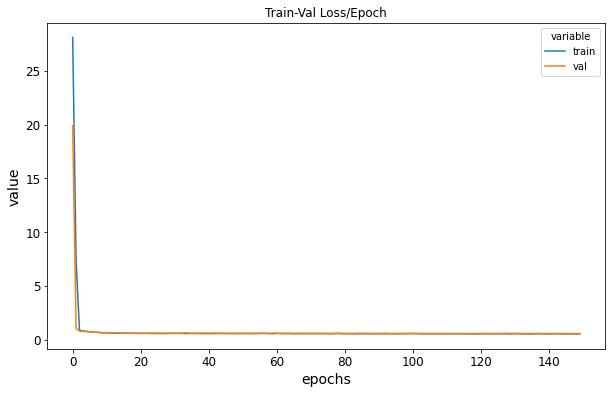

In [57]:
train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
plt.figure(figsize=(10,6))
sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable").set_title('Train-Val Loss/Epoch')

In [58]:
y_pred_list = []
with torch.no_grad():
    model.eval()
    for X_batch, _ in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_pred_list.append(y_test_pred.cpu().numpy())
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [59]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_list)
r_square = r2_score(y_test, y_pred_list)
print("Mean Squared Error :",mse)
print("R^2 :",r_square)

Mean Squared Error : 0.5690353141184221
R^2 : 0.29571279636770187


# Convolutional Neural Network (CNN)

- The fully connected network can function as a universal approximator, but we don't know how long it will take to train it to become a good approximation 
- In particular, for images it could be interesting to capture locality and translation invariance
  - Check the nearby pixels to recognize objects 
  - It leverages the position of the pixels that is completely destroyed in a 1 dimensional array
  - tadaaa convolution: scalar product of a weight matrix (kernel) with every neighborhood in the input.


In [60]:

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

X_train = X[:50000]
y_train = y[:50000]

X_val = X[50000:60000]
y_val = y[50000:60000]

X_test = X[60000:]
y_test = y[60000:]

In [61]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

batch_size = 32 
train_ds = TensorDataset(x_train_tensor, y_train_tensor)
train_dl = DataLoader(
    train_ds, batch_size=batch_size, shuffle=True)

val_ds = TensorDataset(x_val_tensor, y_val_tensor)
val_dl = DataLoader(
    val_ds, batch_size=batch_size, shuffle=True)


test_ds = TensorDataset(x_test_tensor, y_test_tensor)
test_dl = DataLoader(test_ds, batch_size=batch_size)


Convolution parameters: 
- ```in_channel``` is the number of input channels (1 for grey images, 3 for rgb)
- ```out_channel``` the number of output channels
- ```kernel_size``` eight and width of the kernel filter, if only one value is passed then eight = width 
- ```stride``` how many steps across the input we move when we adjust the filter to a new position
- ```padding``` it can happen that we don't have enough elements in our input to do a full convolution. In these cases, the empty values are filled with the ```padding``` values

Pooling layers, they reduce the resolution of the network from the previous input layer, therefore fewer parameters in the lower layers. 
- Faster computation
- it helps to prevent overfitting

There is also a ```padding``` option here. 

In [62]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16,
                              kernel_size=3, stride=1, padding=0)
        self.relu1 = nn.ReLU()

        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)

        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32,
                              kernel_size=3, stride=1, padding=0)
        self.relu2 = nn.ReLU()

        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)

        # Fully connected 1
        self.fc1 = nn.Linear(32 * 5 * 5, 10)

    def forward(self, x, to_print=False):
        # Set 1
        if to_print:
          print('INPUT',x.shape)
        out = self.cnn1(x)
        if to_print:
          print('CNN1',out.shape)
        out = self.relu1(out)
        out = self.maxpool1(out)
        if to_print:
          print('MAXPOOL1',out.shape)

        # Set 2
        out = self.cnn2(out)
        if to_print:
          print('CNN2',out.shape)

        out = self.relu2(out)

        out = self.maxpool2(out)
        if to_print:
          print("after the 2nd maxpool:{} ".format(out.shape))
        # Flatten
        out = out.view(out.size(0), -1)
        if to_print:
          print("after the flatten:{} ".format(out.shape))
        out = self.fc1(out)
        if to_print:
          print('FINAL',out.shape)

        return out

In [63]:
## few changes to the train function used above. 

def train(model, optimizer, loss_fn, train_loader, val_loader, epochs=20, device="cpu",to_print=False):
    for epoch in range(1, epochs+1):
        training_loss = 0.0
        valid_loss = 0.0
        model.train()
        for batch in train_loader:
            optimizer.zero_grad() # clear gradients for next train
            inputs, targets = batch
            inputs = inputs.to(device)
            targets = targets.to(device)
            output = model(inputs,to_print)
            loss = loss_fn(output, targets)
            loss.backward() # backpropagation, compute gradients
            optimizer.step() # apply gradients
            training_loss += loss.data.item() * inputs.size(0)
            # print(training_loss,loss.data.item(),inputs.size(0))
            if to_print:
              break
        training_loss /= len(train_loader.dataset)
        if to_print:
          break
        with torch.no_grad():
          model.eval()
          num_correct = 0 
          num_examples = 0
          for batch in val_loader:
              inputs, targets = batch
              inputs = inputs.to(device)
              output = model(inputs)
              targets = targets.to(device)
              loss = loss_fn(output,targets) 
              valid_loss += loss.data.item() * inputs.size(0)
              correct = torch.eq(torch.max(F.softmax(output, dim=1), dim=1)[1], targets)
              num_correct += torch.sum(correct).item()
              num_examples += correct.shape[0]
          valid_loss /= len(val_loader.dataset)

        print('Epoch: {}, Training Loss: {:.4f}, Validation Loss: {:.4f}, accuracy = {:.4f}'.format(epoch, training_loss,
        valid_loss, num_correct / num_examples))

In [64]:
cnn = CNN()
optimizer = optim.SGD(cnn.parameters(),lr=0.001)
train(cnn, optimizer,torch.nn.CrossEntropyLoss(), train_dl,val_dl, epochs=5)

RuntimeError: ignored

In [65]:
batch_size = 32 
train_ds = TensorDataset(x_train_tensor.reshape(-1,1,28,28), y_train_tensor)
train_dl = DataLoader(
    train_ds, batch_size=batch_size, shuffle=True)

val_ds = TensorDataset(x_val_tensor.reshape(-1,1,28,28), y_val_tensor)
val_dl = DataLoader(
    val_ds, batch_size=batch_size, shuffle=True)


test_ds = TensorDataset(x_test_tensor.reshape(-1,1,28,28), y_test_tensor)
test_dl = DataLoader(test_ds, batch_size=batch_size)

In [66]:
cnn = CNN()
optimizer = optim.Adam(cnn.parameters(),lr=0.001)
train(cnn, optimizer,torch.nn.CrossEntropyLoss(), train_dl,val_dl, epochs=5)

Epoch: 1, Training Loss: 0.3946, Validation Loss: 0.1086, accuracy = 0.9714
Epoch: 2, Training Loss: 0.0962, Validation Loss: 0.0846, accuracy = 0.9768
Epoch: 3, Training Loss: 0.0700, Validation Loss: 0.0778, accuracy = 0.9797
Epoch: 4, Training Loss: 0.0586, Validation Loss: 0.0759, accuracy = 0.9801
Epoch: 5, Training Loss: 0.0516, Validation Loss: 0.0913, accuracy = 0.9781


# Recurrent Neural Networks

- CNNs don't have the concept of _memory_
- This is a crucial when we deal with data that have a temporal domain: a sequence of events: text, speech, vide, time-series data, etc. 
- The RNNs try to solve this problem with a *hidden state*
- We can imagine a RNN as a pipeline of fully connected layers network, where the succesive input being fed into the next layer in the sequence
- Then the error is back propagated through the RNN --> _vanishing gradient_
- A possible solution: Long Short-term Memory, a variant of RNN
 

In [67]:

!pip install -U torch==1.8.0 torchtext==0.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [68]:

import torchtext
from torchtext.legacy import data
import pandas as pd

In [69]:
torchtext.__version__

'0.9.0'

In [70]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [71]:
tweetsDF = pd.read_csv('/content/drive/Shareddrives/MD2SL-material/data/training.1600000.processed.noemoticon.csv',encoding='latin1',engine='python',header=None)

In [72]:
tweetsDF[0].value_counts()


0    800000
4    800000
Name: 0, dtype: int64

In [73]:

tweetsDF.columns

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [74]:
tweetsDF["sentiment_cat"] = tweetsDF[0].astype('category')
tweetsDF["sentiment_cat"].cat.codes

0          0
1          0
2          0
3          0
4          0
          ..
1599995    1
1599996    1
1599997    1
1599998    1
1599999    1
Length: 1600000, dtype: int8

In [75]:
tweetsDF["sentiment"] = tweetsDF["sentiment_cat"].cat.codes
tweetsDF.to_csv("train-processed.csv", header=None, index=None)      
tweetsDF.sample(10000).to_csv("train-processed-sample.csv", header=None, index=None) 


```torchtext``` takes a straigthforward approach to generating datasets, but you need to define the _fields_. 
The class ```Fields``` is what we need to use, it could take several parameters, give a look to the documentation:
[Class Field documentation](https://pytorch.org/text/_modules/torchtext/data/field.html)

In [76]:
LABEL = data.LabelField() #a subclass of Field that sets sequential to False
TWEET = data.Field('spacy', tokenizer_language='en_core_web_sm', lower=True)

fields = [('score',None), ('id',None), ('date',None), ('query',None),
          ('name',None), ('tweet', TWEET), ('category',None), ('label',LABEL)]

This is then passed to the TabularDataset with all the fields we need 

In [77]:
twitterDataset = data.dataset.TabularDataset(
        path="train-processed-sample.csv", 
        format="CSV", 
        fields=fields,
        skip_header=False)

In [78]:

(train, test, valid) = twitterDataset.split(split_ratio=[0.8,0.1,0.1],
                                            stratified=True, strata_field='label')

(len(train),len(test),len(valid))

(8000, 1000, 1000)

In [79]:

vocab_size = 20000
# torchtext is building for us the one_hot_encoding for the words
TWEET.build_vocab(train, max_size = vocab_size)
LABEL.build_vocab(train)
TWEET.vocab.freqs.most_common(10)

[('i', 3705),
 ('to', 2867),
 ('the', 2584),
 ('a', 1861),
 ('my', 1525),
 ('and', 1505),
 ('you', 1228),
 ('for', 1140),
 ('is', 1128),
 ('in', 1017)]

In [80]:
print('How big is our vocabolary? {}'.format(len(TWEET.vocab)))

#1 for unk
#2 for padding, a padding token that will be used to pad all our to roughly the same sie

How big is our vocabolary? 20002


In [81]:
'''
torchtext provides the BucketIterator method that will produce what it calls a 
batch. Similar to the data loader we used before
'''


train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
    (train, valid, test),
    batch_size = 32,
    device = device,
    sort_key = lambda x: len(x.tweet),
    sort_within_batch = False)

In [82]:
class OurFirstLSTM(nn.Module):
    def __init__(self, hidden_size, embedding_dim, vocab_size):
        super(OurFirstLSTM, self).__init__()
    
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.encoder = nn.LSTM(input_size=embedding_dim,  
                hidden_size=hidden_size, num_layers=1)
        self.predictor = nn.Linear(hidden_size, 2)

    def forward(self, seq):
        output, (hidden,_) = self.encoder(self.embedding(seq))
        preds = self.predictor(hidden.squeeze(0))
        return preds



3 layers: 
- the words of our tweet are pushed in ```Embeddings``` layer, with 300-dimensional vector
- then fed into a LSTM with 100 hidden features
- standard fully connected layer with 3 outputs corresponding to our three possible classes 

In [83]:
def train(epochs, model, optimizer, criterion, train_iterator, valid_iterator):
    for epoch in range(1, epochs+1):
     
        training_loss = 0.0
        valid_loss = 0.0
        model.train()
        for batch_idx, batch in enumerate(train_iterator):
            optimizer.zero_grad()
            predict = model(batch.tweet) ##we need to specify which field
            loss = criterion(predict,batch.label)
            loss.backward()
            optimizer.step()
            training_loss += loss.data.item() * batch.tweet.size(0)
        training_loss /= len(train_iterator)
 
        with torch.no_grad():
          model.eval()
          for batch_idx,batch in enumerate(valid_iterator):
              predict = model(batch.tweet)
              loss = criterion(predict,batch.label)
              valid_loss += loss.data.item() * batch.tweet.size(0)
          valid_loss /= len(valid_iterator)
          print('Epoch: {}, Training Loss: {:.2f}, Validation Loss: {:.2f}'.format(epoch, training_loss, valid_loss))

In [84]:
model = OurFirstLSTM(100,300, 20002)
model.to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

train(5, model, optimizer, criterion, train_iterator, valid_iterator)        

Epoch: 1, Training Loss: 18.92, Validation Loss: 10.28
Epoch: 2, Training Loss: 17.06, Validation Loss: 9.22
Epoch: 3, Training Loss: 13.98, Validation Loss: 10.68
Epoch: 4, Training Loss: 12.45, Validation Loss: 12.36
Epoch: 5, Training Loss: 10.54, Validation Loss: 13.78


In [85]:
'''
torchtext doesn't help when we want to predict
We need to emulate the preprocessing pipeline, and make the prediction on the
output of that pipeline
'''

def classify_tweet(tweet,device='cpu'):
    '''
    preprocess performs the tokenization,
    then we call process on the resulting 
    tokens to obtain a tensor based on our already built vocabulary
    '''
    model.to(device)
    categories = {0: "Negative", 1:"Positive"}
    processed = TWEET.process([TWEET.preprocess(tweet)])
    processed = processed.float().to(device)
    print(processed)
    model.eval()
    return categories[model(processed).argmax().item()]

In [86]:
device = 'cpu'

In [87]:
model.to(device)
with torch.no_grad():
  model.eval()
  for batch in test_iterator:
    outputs = model(batch.tweet.to(device))

In [89]:
def classify_tweet(tweet):
    categories = {0: "Negative", 1:"Positive"}
    processed = TWEET.process([TWEET.preprocess(tweet)])
    processed = processed.to(device)
    model.eval()
    return categories[model(processed).argmax().item()]

In [90]:
test[0].tweet

['pain', 'meds', 'are', 'not', 'kicking', 'in', 'quick', 'enough']

In [91]:
for i in range(0,10):
  sentiment = classify_tweet(test[i].tweet)
  print(test[i].tweet,test[i].label,sentiment,)

['pain', 'meds', 'are', 'not', 'kicking', 'in', 'quick', 'enough'] 0 Positive
['back', 'to', 'school', 'on', 'monday...well', 'i', 'did', 'get', 'an', 'ipod', 'touch.', '@shmuxel', '+', '@randomized180', 'see', 'yah', 'tomorrow', 'then', 'i', 'guess'] 0 Negative
['@poojarazdan', 'i', 'thought', 'i', 'read', '-', 'you', 'were', 'awake', 'all', 'night', 'working', '-', 'sniff', 'sniff'] 0 Negative
['#yycphotobook', 'i', 'missed', 'your', 'spot', 'today.', 'will', 'someone', 'be', 'putting', 'online?'] 0 Negative
['has', 'sats', 'tomorrow,', 'bright', 'and', 'early.'] 0 Negative
['@sweetisa', 'damn.', 'that', 'sucks'] 0 Negative
['you', 'all', "shouldn't", 'be', 'allowed', 'to', 'use', 'twitter.', 'and', 'why', 'is', 'it', 'lightening', 'by', 'my', 'house'] 0 Positive
['@kwod', '-', 'so', 'sad', 'you', 'guys', 'are', 'going', 'away.'] 0 Negative
['@ckc406', "i'm", 'sorry', 'you', 'had', 'such', 'a', 'bad', 'weekend', '*hugs*'] 0 Negative
['@preachdotcom', 'lol', 'its', 'sucks', 'a', 'lot'

### Time-series 
Let's try with LSTM applied to timeseries

In [92]:
flight_data = sns.load_dataset("flights")
flight_data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


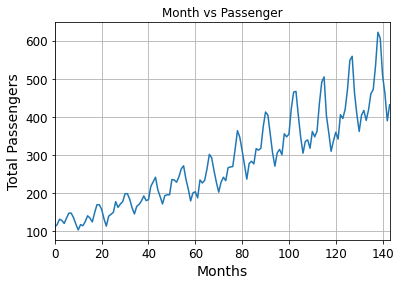

In [93]:
plt.title('Month vs Passenger')
plt.ylabel('Total Passengers')
plt.xlabel('Months')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(flight_data['passengers'])

In [94]:
all_data = flight_data['passengers'].values.astype(float)

test_data_size = 12

train_data = all_data[:-test_data_size]
test_data = all_data[-test_data_size:]

In [95]:
print(len(train_data))
print(len(test_data))

132
12


In [96]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
train_data_normalized = scaler.fit_transform(train_data .reshape(-1, 1))

In [97]:
train_data_normalized = torch.FloatTensor(train_data_normalized).view(-1)


In [98]:
train_window = 12

In [99]:
'''
The function will accept the raw input data and will return a list of tuples. 
In each tuple, the first element will contain list of 12 items corresponding 
to the number of passengers traveling in 12 months, the second tuple element 
will contain one item i.e. the number of passengers in the 12+1st month
'''

def create_inout_sequences(input_data, tw):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+tw:i+tw+1]
        inout_seq.append((train_seq ,train_label))
    return inout_seq

In [100]:
train_inout_seq = create_inout_sequences(train_data_normalized, train_window)


In [101]:
train_inout_seq[0]

(tensor([-0.9648, -0.9385, -0.8769, -0.8901, -0.9253, -0.8637, -0.8066, -0.8066,
         -0.8593, -0.9341, -1.0000, -0.9385]), tensor([-0.9516]))

In [122]:
'''
input_size: Corresponds to the number of features in the input.
Though our sequence length is 12, for each month we have only 
1 value i.e. total number of passengers, therefore the input size will be 1.
'''

'''
hidden_layer_size: Specifies the number of hidden layers along 
with the number of neurons in each layer. 
We will have one layer of 100 neurons.
'''

'''
output_size: The number of items in the output, 
since we want to predict the number of passengers
for 1 month in the future, the output size will be 1.
'''

'''
Inside the forward method, the input_seq is passed as a parameter, 
which is first passed through the lstm layer. The output of the lstm layer is 
the hidden and cell states at current time step, along with the output. 
The output from the lstm layer is passed to the linear layer. 
The predicted number of passengers is stored in the last item of the 
predictions list, which is returned to the calling function.
'''


class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=150, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size)

        self.linear = nn.Linear(hidden_layer_size, output_size)

        self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                            torch.zeros(1,1,self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]




In [129]:
model = LSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [131]:
epochs = 300

for i in range(epochs):
    for seq, labels in train_inout_seq:
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))

        y_pred = model(seq)

        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')


epoch:   1 loss: 0.01065427
epoch:  26 loss: 0.00166018
epoch:  51 loss: 0.00433911
epoch:  76 loss: 0.00026802
epoch: 101 loss: 0.00061352
epoch: 126 loss: 0.00008835
epoch: 151 loss: 0.00001902
epoch: 176 loss: 0.00022244
epoch: 201 loss: 0.00058142
epoch: 226 loss: 0.00000408
epoch: 251 loss: 0.00000511
epoch: 276 loss: 0.00032521
epoch: 299 loss: 0.0001822212


In [132]:
fut_pred = 12

test_inputs = train_data_normalized[-train_window:].tolist()

model.eval()

for i in range(fut_pred):
    seq = torch.FloatTensor(test_inputs[-train_window:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))
        test_inputs.append(model(seq).item())
test_inputs[fut_pred:]


[0.36564379930496216,
 0.3499853312969208,
 0.4812115430831909,
 0.5843085646629333,
 0.7367053031921387,
 0.8811313509941101,
 1.034912347793579,
 1.0286751985549927,
 0.9189870357513428,
 0.8928430676460266,
 0.8795860409736633,
 0.9184947609901428]

In [133]:
actual_predictions = scaler.inverse_transform(np.array(test_inputs[train_window:] ).reshape(-1, 1))
print(actual_predictions)

[[414.68396434]
 [411.12166287]
 [440.97562605]
 [464.43019846]
 [499.10045648]
 [531.95738235]
 [566.94255912]
 [565.52360767]
 [540.56955063]
 [534.62179789]
 [531.60582432]
 [540.45755813]]


In [134]:
x = np.arange(132, 144, 1)
print(x)

[132 133 134 135 136 137 138 139 140 141 142 143]


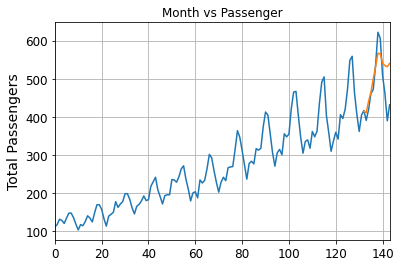

In [135]:
plt.title('Month vs Passenger')
plt.ylabel('Total Passengers')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(flight_data['passengers'])
plt.plot(x,actual_predictions)
plt.show()